# Title of the project: Placement Prediction Analysis



# Team Members: 
Anantha Narayanan S V (E0119008)

Aparna S (E0119020)

Anbu Ezhilmathi Nambi (E0119053)              


# Problem Statement:
Analysis and predict whether a 
student gets placed or not based on stream, cgpa, internships 
and other factors

# Data Description :
The Collegeplacement data gives us the student informations such as  Age,Gender           their stream,no.of internships,their CGPA,and if they are in hostel or not.

# Software Requirements and Platforms used: 
*   OS: Windows
*   Platforms: Google Collab, Jupyter Notebook
*   Language Used : R Language.




## CO1 : Know your Data 

#### Packages Used 

In [1]:
# install.packages("psych")
# install.packages('dplyr')
# install.packages('tidyr')
# install.packages('ggplot2')
# install.packages('lubridate')
# install.packages('highcharter')
# install.packages('scales')
# install.packages("Hmisc")
# install.packages("performance")
# install.packages("caret")
# install.packages("corrplot")
# Installing the package
# For Logistic regression
# install.packages("caTools")    

# For ROC curve to evaluate model
# install.packages("ROCR")       
    

In [2]:
library('dplyr') # we are using this for filter()
library('tidyr') # we are using this for data manipulation, exploration and visualization
library('ggplot2') # we are using this to visualize graphs
library('highcharter') # we are using this for piping style and also for visualizing various charts
library('scales')
library('psych')# we are using this for analyzing data at multiple levels include within and between group statistics, including correlations and factor analysis.
library('Hmisc')
library('caret')
library("corrplot")
library('caTools')

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'highcharter' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Highcharts (www.highcharts.com) is a Highsoft software product which is
not free for commercial and Governmental use
Warning message:
"package 'scales' was built under R version 3.6.3"
Attaching package: 'psych'

The following objects are masked from 'package:scales':

    alpha, rescale

The following objects are masked from 'package:ggplot2':

    %+%, alpha

Warning message:
"package 'Hmisc' was built under R versi

In [3]:
#Import the dataset 
placement = read.csv("collegePlace.csv")
head(placement)

Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
22,Male,Electronics And Communication,1,8,1,Yes,Yes
21,Female,Computer Science,0,7,1,Yes,Yes
22,Female,Information Technology,1,6,0,No,Yes
21,Male,Information Technology,0,8,0,Yes,Yes
22,Male,Mechanical,0,8,1,No,Yes
22,Male,Electronics And Communication,0,6,0,No,No


In [4]:
#Check and displaying any null values present in the dataset
lapply(placement,function(x) { length(which(is.na(x)))})

$Age
[1] 0

$Gender
[1] 0

$Stream
[1] 0

$Internships
[1] 0

$CGPA
[1] 0

$Hostel
[1] 0

$HistoryOfBacklogs
[1] 0

$PlacedOrNot
[1] 0

#### To know the attribute types

In [5]:
sapply(placement,'class')

Age            Gender            Stream       Internships 
        "integer"          "factor"          "factor"         "integer" 
             CGPA            Hostel HistoryOfBacklogs       PlacedOrNot 
        "integer"         "integer"          "factor"          "factor"

In [6]:
#using the psych library
#describe(): this function gives the statistical summary of the data
library(psych)
describe(placement)

placement 

 8  Variables      2966  Observations
--------------------------------------------------------------------------------
Age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    2966        0       11    0.917    21.49    1.363       19       20 
     .25      .50      .75      .90      .95 
      21       21       22       23       24 

lowest : 19 20 21 22 23, highest: 25 26 28 29 30
                                                                            
Value         19    20    21    22    23    24    25    26    28    29    30
Frequency    156   375  1084   941   195   131    29    50     3     1     1
Proportion 0.053 0.126 0.365 0.317 0.066 0.044 0.010 0.017 0.001 0.000 0.000
--------------------------------------------------------------------------------
Gender 
       n  missing distinct 
    2966        0        2 
                        
Value      Female   Male
Frequency     491   2475
Proportion  0.166  0.834
-----------------------

In [7]:
#summary():this command provides summary of the data like min,max and quantile.
summary(placement)

      Age           Gender                               Stream   
 Min.   :19.00   Female: 491   Civil                        :317  
 1st Qu.:21.00   Male  :2475   Computer Science             :776  
 Median :21.00                 Electrical                   :334  
 Mean   :21.49                 Electronics And Communication:424  
 3rd Qu.:22.00                 Information Technology       :691  
 Max.   :30.00                 Mechanical                   :424  
  Internships          CGPA           Hostel      HistoryOfBacklogs PlacedOrNot
 Min.   :0.0000   Min.   :5.000   Min.   :0.000   No :2396          No :1327   
 1st Qu.:0.0000   1st Qu.:6.000   1st Qu.:0.000   Yes: 570          Yes:1639   
 Median :1.0000   Median :7.000   Median :0.000                                
 Mean   :0.7036   Mean   :7.074   Mean   :0.269                                
 3rd Qu.:1.0000   3rd Qu.:8.000   3rd Qu.:1.000                                
 Max.   :3.0000   Max.   :9.000   Max.   :1.000    

In [8]:
#dim(): this is a inbuilt function which gives us the dimention of the matrix, array or data frame.
dim(placement)

[1] 2966    8

In [9]:
#str(): this is a inbuilt function which gives us information about the columns like class and intial observations.
str(placement)

'data.frame':	2966 obs. of  8 variables:
 $ Age              : int  22 21 22 21 22 22 21 21 21 21 ...
 $ Gender           : Factor w/ 2 levels "Female","Male": 2 1 1 2 2 2 2 2 2 1 ...
 $ Stream           : Factor w/ 6 levels "Civil","Computer Science",..: 4 2 5 5 6 4 2 5 2 2 ...
 $ Internships      : int  1 0 1 0 0 0 0 1 2 1 ...
 $ CGPA             : int  8 7 6 8 8 6 7 7 6 6 ...
 $ Hostel           : int  1 1 0 0 1 0 0 0 0 1 ...
 $ HistoryOfBacklogs: Factor w/ 2 levels "No","Yes": 2 2 1 2 1 1 2 1 1 1 ...
 $ PlacedOrNot      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 1 1 2 1 ...


#### Five number summary of CGPA

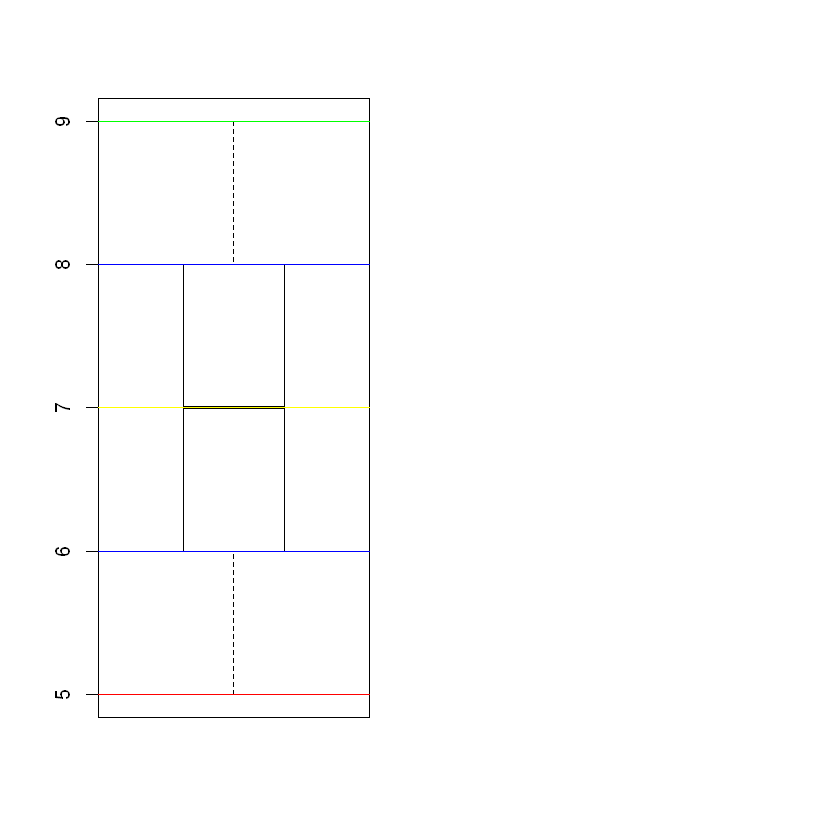

In [10]:
# This gives the visual summary of the mean median valuse and the disperrsion of the cgpa they aslo show us the skewness.
par(mfrow= c(1,2))
boxplot(placement$CGPA)
abline(h=min(placement$CGPA),col='Red')
abline(h=median(placement$CGPA),col='yellow')
abline(h=max(placement$CGPA),col="Green")
abline(h=quantile(placement$CGPA,
                  c(0.25,0.75)), col= "Blue")

#### Total male and female students 

In [11]:
#table() function in R Language is used to create a categorical representation of data with variable name and the frequency in the form of a table
class <-table(placement$Gender)
class


Female   Male 
   491   2475 

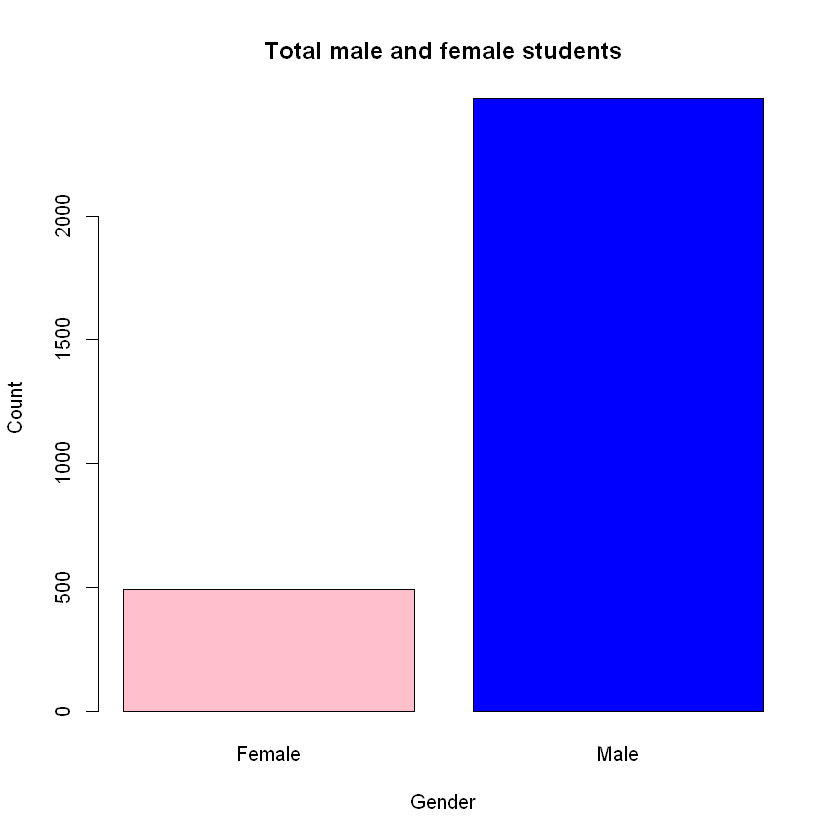

In [12]:
barplot(class, c("#FF6666","#3399ff"),main="Total male and female students", xlab="Gender",ylab="Count")

#### Age and no.of students

In [13]:
#Age frequency table : No of students in each age group is shown below:
age=table(placement$Age)
age


  19   20   21   22   23   24   25   26   28   29   30 
 156  375 1084  941  195  131   29   50    3    1    1 

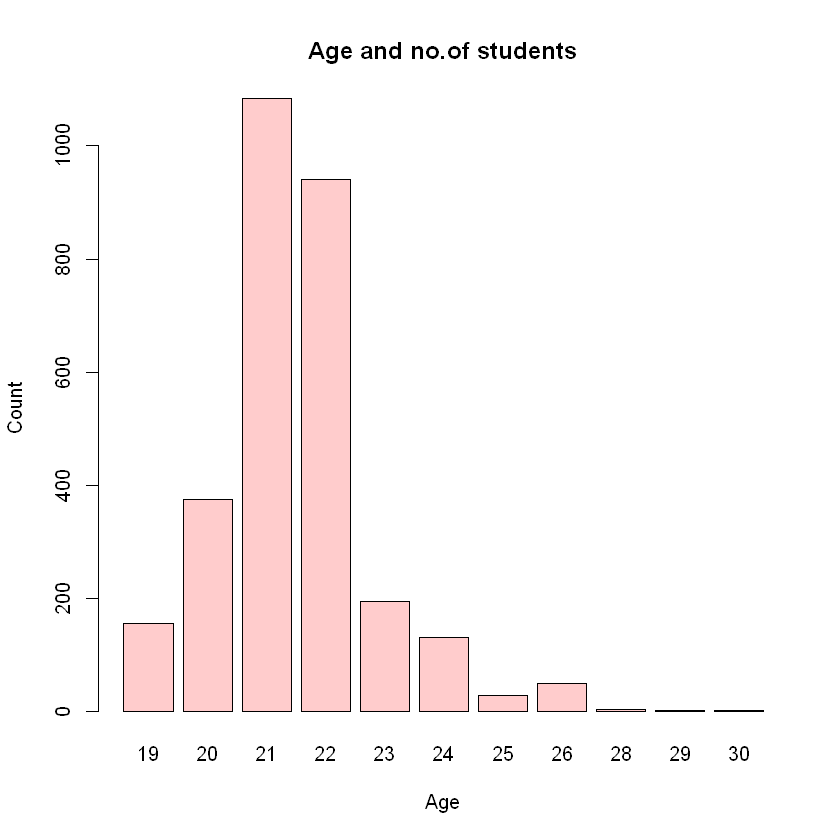

In [14]:
barplot(age,xlab="Age",ylab="Count", main="Age and no.of students",col="#FFCCCC")

#### No.of students in each streams

In [15]:
stream=table(placement$Stream)
stream


                        Civil              Computer Science 
                          317                           776 
                   Electrical Electronics And Communication 
                          334                           424 
       Information Technology                    Mechanical 
                          691                           424 

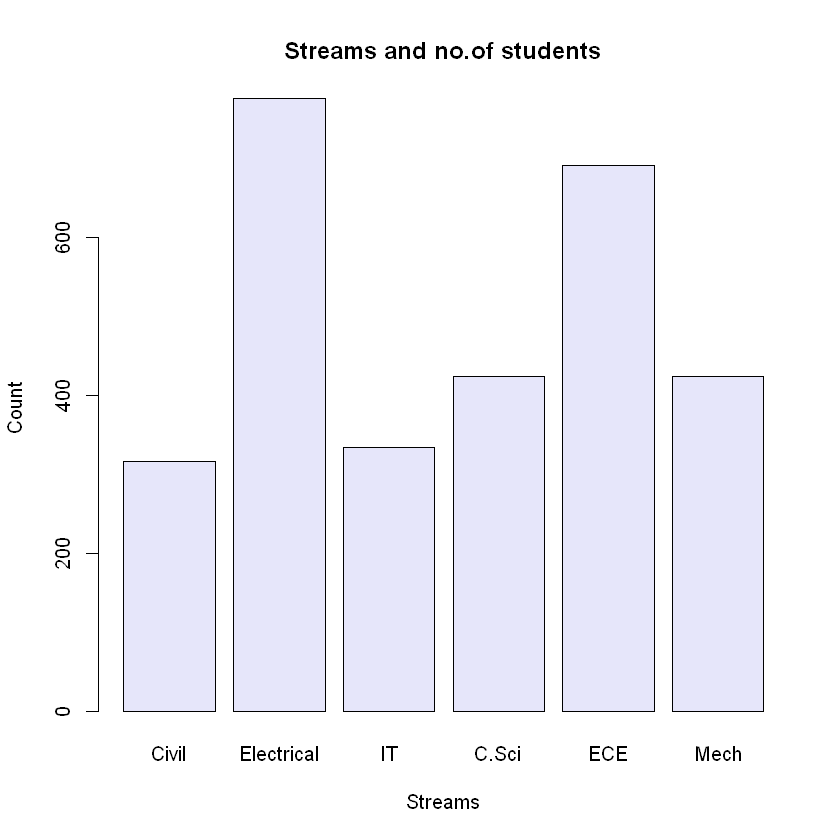

In [16]:
 barplot(stream,xlab="Streams",ylab="Count", main="Streams and no.of students",col="#E6E6FA",names.arg=c("Civil","Electrical","IT","C.Sci","ECE","Mech"))

#### No.of students and where they stay

In [17]:
dayscholar= sum(placement$Hostel == '0')
dayscholar
hostelers= sum(placement$Hostel == '1')
hostelers

[1] 2168

[1] 798

In [18]:
data <- data.frame(
  category=c("dayscholar", "hostelers"),
  count=c(dayscholar,hostelers)
)
data

category,count
dayscholar,2168
hostelers,798


In [19]:
library(tidyverse)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.2.1 --
v tibble  3.1.1     v purrr   0.3.4
v readr   1.3.1     v stringr 1.4.0
v tibble  3.1.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x psych::%+%()        masks ggplot2::%+%()
x psych::alpha()      masks scales::alpha(), ggplot2::alpha()
x readr::col_factor() masks scales::col_factor()
x purrr::discard()    masks scales::discard()
x dplyr::filter()     masks stats::filter()
x dplyr::lag()        masks stats::lag()
x purrr::lift()       masks caret::lift()
x Hmisc::src()        masks dplyr::src()
x Hmisc::summarize()  masks dplyr::summarize()


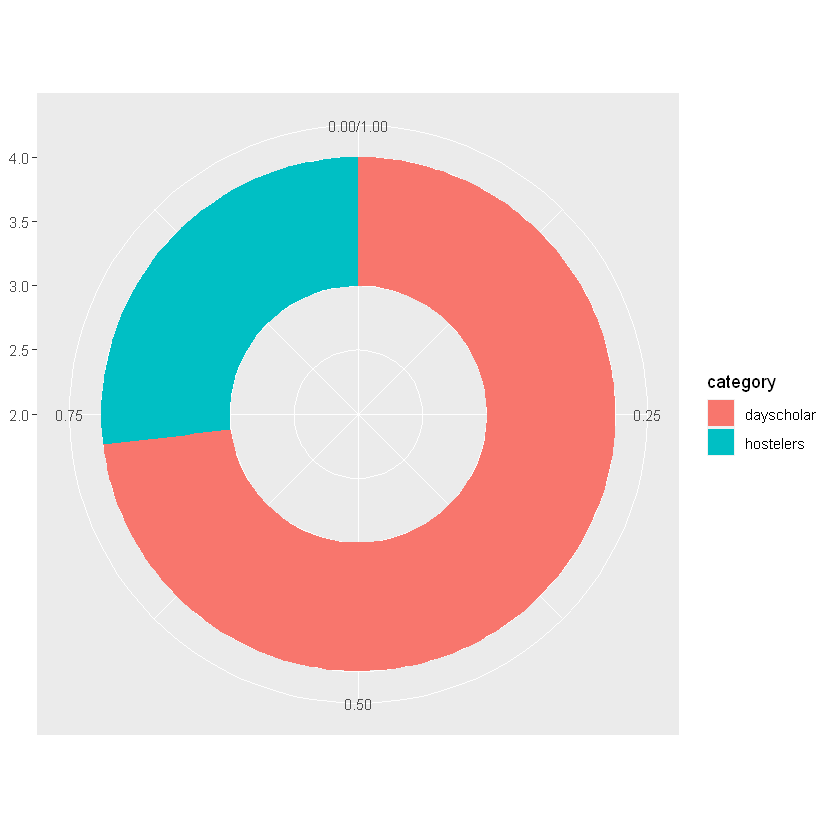

In [20]:
data$fraction = data$count / sum(data$count)
data$ymax = cumsum(data$fraction)
data$ymin = c(0, head(data$ymax, n=-1))
ggplot(data, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=category)) +
     geom_rect() +
     coord_polar(theta="y") + 
     xlim(c(2, 4)) 

## CO2: Data Wrangling

#### Encoding categorical data ( for required attributes)

In [21]:
placement$PlacedOrNot = factor(placement$PlacedOrNot,
                           levels = c('No', 'Yes'),
                           labels = c(0, 1))
placement$HistoryOfBacklogs = factor(placement$HistoryOfBacklogs,
                           levels = c('No', 'Yes'),
                           labels = c(0, 1))

head(placement)

Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
22,Male,Electronics And Communication,1,8,1,1,1
21,Female,Computer Science,0,7,1,1,1
22,Female,Information Technology,1,6,0,0,1
21,Male,Information Technology,0,8,0,1,1
22,Male,Mechanical,0,8,1,0,1
22,Male,Electronics And Communication,0,6,0,0,0


#### Grouping the age attributes into 4 levels using binning :
*   Binning or discretization is used for the transformation of a continuous or numerical variable into a categorical feature. 
*   Binning of continuous variable introduces non-linearity and tends to improve the performance of the model.
*  It can be also used to identify missing values or outliers.

In [22]:
placement$AgeGroup <- cut(placement$Age, breaks=4, labels=c("19-21","22-24","25-27","28-30"))
head(placement)

Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,AgeGroup
22,Male,Electronics And Communication,1,8,1,1,1,22-24
21,Female,Computer Science,0,7,1,1,1,19-21
22,Female,Information Technology,1,6,0,0,1,22-24
21,Male,Information Technology,0,8,0,1,1,19-21
22,Male,Mechanical,0,8,1,0,1,22-24
22,Male,Electronics And Communication,0,6,0,0,0,22-24


#### Standardisation of the data
 Standardisation of datasets provide structured methods and reliable data that save time in the innovation process and also reduce the spread of the numerical variables.

 **Standardisation value = X – μ/σ**

In [23]:
#Install the caret package
#install.packages("caret")

In [24]:
library(caret)
data <-  subset(placement, select = -c(8) )
placement.pre <- preProcess(data, method=c("center", "scale"))
data1 <- predict(placement.pre, data)
head(data1)

Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,AgeGroup
0.3880651,Male,Electronics And Communication,0.4003779,0.95702930,1.6479915,1,22-24
-0.3666897,Female,Computer Science,-0.9506129,-0.07629757,1.6479915,1,19-21
0.3880651,Female,Information Technology,0.4003779,-1.10962444,-0.6065947,0,22-24
-0.3666897,Male,Information Technology,-0.9506129,0.95702930,-0.6065947,1,19-21
0.3880651,Male,Mechanical,-0.9506129,0.95702930,1.6479915,0,22-24
0.3880651,Male,Electronics And Communication,-0.9506129,-1.10962444,-0.6065947,0,22-24


In [25]:
data1 <- cbind(data1, data.frame(placement$PlacedOrNot))
colnames(data1[9]) <- "PlacedOrNot"
head(data1[9])

placement.PlacedOrNot
1
1
1
1
1
0


## CO3: Data Modeling and Analysis

#### Female students who got placed or not :

In [26]:
filter_female <- placement %>%filter(Gender=="Female") %>%
  group_by(PlacedOrNot)
head(filter_female)

Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,AgeGroup
21,Female,Computer Science,0,7,1,1,1,19-21
22,Female,Information Technology,1,6,0,0,1,22-24
21,Female,Computer Science,1,6,1,0,0,19-21
22,Female,Electrical,1,8,0,1,1,22-24
21,Female,Computer Science,2,6,1,1,0,19-21
21,Female,Electronics And Communication,2,8,0,0,1,19-21


In [27]:
count(filter_female)

PlacedOrNot,n
0,216
1,275


#### Male students who got placed or not:

In [28]:
filter_male <- placement %>%filter(Gender=="Male") %>%
  group_by(PlacedOrNot)
head(filter_male)

Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,AgeGroup
22,Male,Electronics And Communication,1,8,1,1,1,22-24
21,Male,Information Technology,0,8,0,1,1,19-21
22,Male,Mechanical,0,8,1,0,1,22-24
22,Male,Electronics And Communication,0,6,0,0,0,22-24
21,Male,Computer Science,0,7,0,1,0,19-21
21,Male,Information Technology,1,7,0,0,0,19-21


In [29]:
count(filter_male)

PlacedOrNot,n
0,1111
1,1364


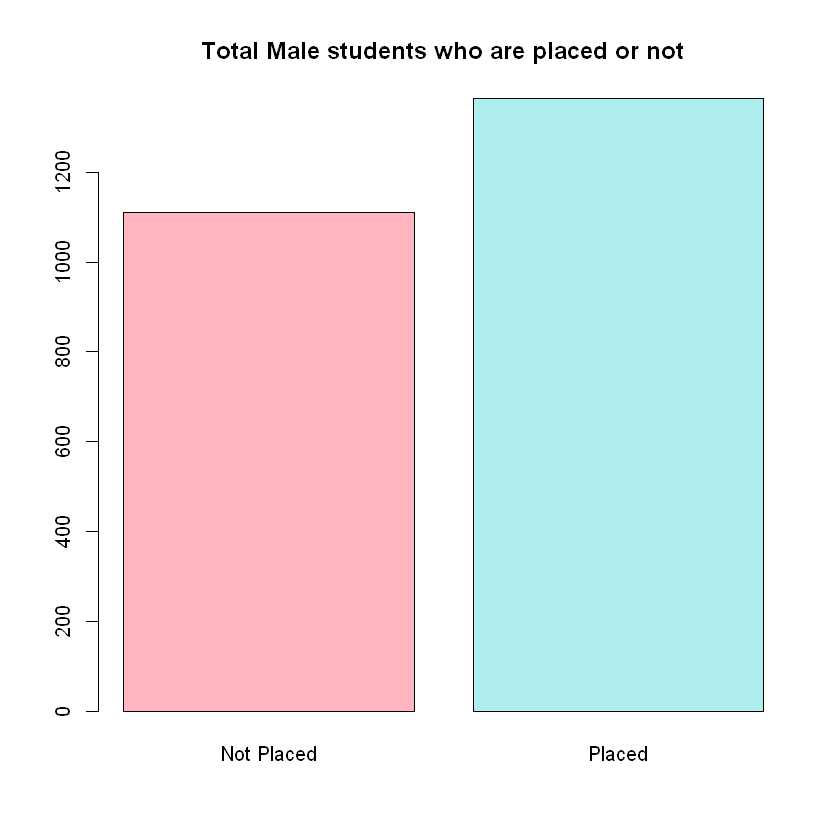

In [30]:
mt=data.matrix(factor(filter_male$PlacedOrNot))
mt_final=summary(factor(mt,
                        labels=c('Not Placed','Placed'),
                        levels=c(0,1)))
barplot(mt_final,col=c("#FFB6C1","#AFEEEE"),main="Total Male students who are placed or not")

#### No.of students by their age group

In [31]:
AgeGroup1= sum(placement$AgeGroup == '19-21')
AgeGroup2= sum(placement$AgeGroup == '22-24')
AgeGroup3= sum(placement$AgeGroup == '25-27')
AgeGroup4= sum(placement$AgeGroup == '28-30')

In [32]:
AgeGroups <- data.frame(
  category=c("19-21", "22-24","25-27","28-30"),
  count=c(AgeGroup1,AgeGroup2,AgeGroup3,AgeGroup4)
)
AgeGroups

category,count
19-21,1615
22-24,1267
25-27,79
28-30,5


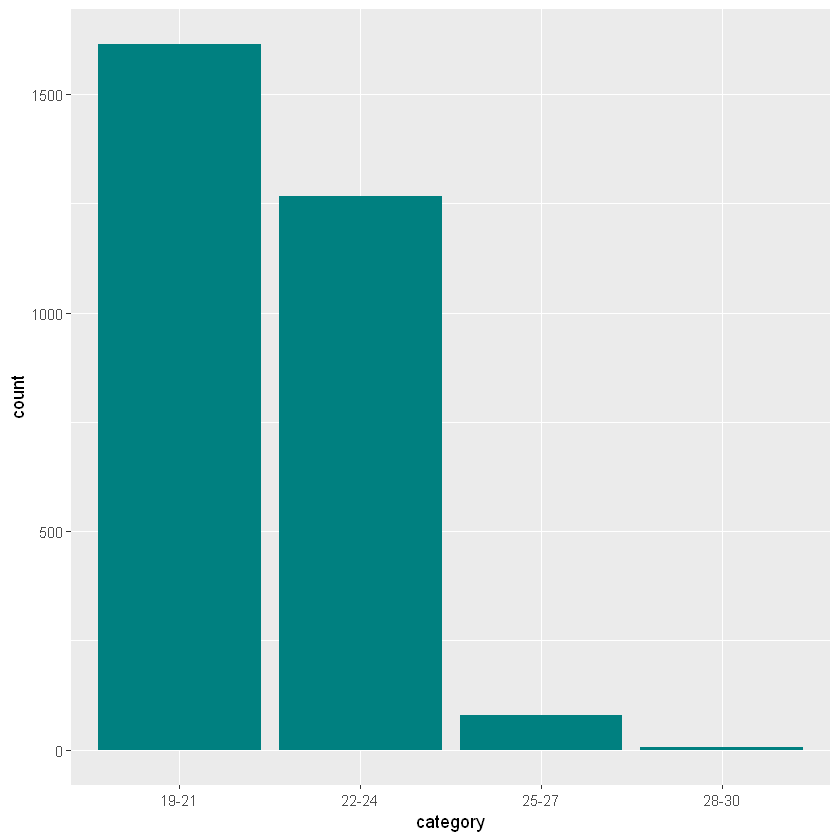

In [33]:
library(ggplot2)

# Barplot
ggplot(AgeGroups, aes(x=category, y=count)) + 
  geom_bar(stat = "identity",fill="#008080")

### Logistic regression
*   Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. 
*   The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

*  Logistic regression can be divided into following types :

1.   Binary or Binomial

2.   Multinomial

3.   Ordinal

In [34]:
# Installing the package For Logistic regression
#install.packages("caTools")    

In [35]:
# Loading the libraries
library(caTools)

In [36]:
split <- sample.split(data1, SplitRatio = 0.8)
split
# subset(): Here it is used to select and filter variables into train and test data
train_reg <- subset(data1, split == "TRUE")
test_reg <- subset(data1, split == "FALSE")

[1]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE

In [37]:
#Training model
logistic_model <- glm(placement.PlacedOrNot ~ CGPA + Internships + HistoryOfBacklogs+
                      + Age  + Hostel,family=binomial(link='logit'),
                    data = train_reg)
logistic_model
# Summary
summary(logistic_model)


Call:  glm(formula = placement.PlacedOrNot ~ CGPA + Internships + HistoryOfBacklogs + 
    +Age + Hostel, family = binomial(link = "logit"), data = train_reg)

Coefficients:
       (Intercept)                CGPA         Internships  HistoryOfBacklogs1  
           0.34158             1.90913             0.59393            -0.08147  
               Age              Hostel  
           0.41277            -0.15675  

Degrees of Freedom: 2306 Total (i.e. Null);  2301 Residual
Null Deviance:	    3178 
Residual Deviance: 2041 	AIC: 2053


Call:
glm(formula = placement.PlacedOrNot ~ CGPA + Internships + HistoryOfBacklogs + 
    +Age + Hostel, family = binomial(link = "logit"), data = train_reg)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1863  -0.6993   0.2415   0.6211   2.6335  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         0.34158    0.06227   5.485 4.13e-08 ***
CGPA                1.90913    0.07820  24.412  < 2e-16 ***
Internships         0.59393    0.05909  10.051  < 2e-16 ***
HistoryOfBacklogs1 -0.08147    0.13817  -0.590   0.5554    
Age                 0.41277    0.05783   7.137 9.51e-13 ***
Hostel             -0.15675    0.05596  -2.801   0.0051 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3178.1  on 2306  degrees of freedom
Residual deviance: 2041.0  on 2301  degrees of freedom
AIC: 2053

Number of Fisher Scoring iterations: 5


# CO4: Mining Techniques in R

#### Decision Tree
Decision tree is a graph to represent choices and their results in form of a tree. The nodes in the graph represent an event or choice and the edges of the graph represent the decision rules or conditions. It is mostly used in Machine Learning and Data Mining applications using R.

In [38]:
# install.packages("party")
# install.packages("randomForest")

In [39]:
# The package "party" has the function ctree() which is used to create and analyze decison tree.
library(party)
 output.tree <- ctree(placement.PlacedOrNot ~ CGPA + Internships + HistoryOfBacklogs+
                      + Age  + Hostel,
  data = train_reg)

Warning message:
"package 'party' was built under R version 3.6.3"Loading required package: grid
Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.3"Loading required package: modeltools
Warning message:
"package 'modeltools' was built under R version 3.6.3"Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich

Attaching package: 'strucchange'

The following object is masked from 'package:stringr':

    boundary



In [40]:
output.tree


	 Conditional inference tree with 10 terminal nodes

Response:  placement.PlacedOrNot 
Inputs:  CGPA, Internships, HistoryOfBacklogs, Age, Hostel 
Number of observations:  2307 

1) CGPA <= -0.07629757; criterion = 1, statistic = 824.311
  2) Internships <= 0.4003779; criterion = 1, statistic = 128.528
    3) Age <= 1.14282; criterion = 1, statistic = 73.276
      4) Hostel <= -0.6065947; criterion = 1, statistic = 16.22
        5) CGPA <= -1.109624; criterion = 0.999, statistic = 14.639
          6)*  weights = 411 
        5) CGPA > -1.109624
          7) Internships <= -0.9506129; criterion = 0.974, statistic = 7.804
            8)*  weights = 240 
          7) Internships > -0.9506129
            9)*  weights = 206 
      4) Hostel > -0.6065947
        10)*  weights = 298 
    3) Age > 1.14282
      11) CGPA <= -1.109624; criterion = 0.981, statistic = 8.336
        12) CGPA <= -2.142951; criterion = 1, statistic = 57.664
          13)*  weights = 8 
        12) CGPA > -2.142951
 

### Random Forest

In the random forest approach, a large number of decision trees are created. Every observation is fed into every decision tree. The most common outcome for each observation is used as the final output. A new observation is fed into all the trees and taking a majority vote for each classification model.

An error estimate is made for the cases which were not used while building the tree. That is called an OOB (Out-of-bag) error estimate which is mentioned as a percentage.

The package "randomForest" has the function randomForest() which is used to create and analyze random forests.

In [41]:
library(randomForest)
output.forest <- randomForest(placement.PlacedOrNot ~ CGPA + Internships + HistoryOfBacklogs+
                      + Age  + Hostel,
           data = train_reg)

Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:psych':

    outlier

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine



The residual sum of squares (RSS) is a statistical technique used to measure the amount of variance in a data set that is not explained by a regression model itself. Instead, it estimates the variance in the residuals, or error term.

In [42]:
output.forest


Call:
 randomForest(formula = placement.PlacedOrNot ~ CGPA + Internships +      HistoryOfBacklogs + +Age + Hostel, data = train_reg) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 11.31%
Confusion matrix:
     0    1 class.error
0 1021   25  0.02390057
1  236 1025  0.18715305

# CO5: Implementing case study in R : Describe the scenario taken for analysis 
Our objective in this analysis is to know the prediction of getting placed or not depending on the various independent attributes like CGPA, Internships taken, No of backlogs etc. 

In [43]:
#  Predict test data based on model
predict_reg <- predict(logistic_model, 
               as.data.frame(subset(test_reg, select = c(CGPA, Internships, HistoryOfBacklogs,Age, Hostel) )), type = "response")
 head(predict_reg)

2          9         11         18         20         27 
0.29737435 0.31154233 0.66574053 0.08334719 0.66574053 0.93473097

 Conversion of probability outputs into 0s or 1s for better 
 summary of prediction 

In [44]:
predict_reg = ifelse(predict_reg>=0.5,ave(predict_reg, FUN = function(x) 1),0)
head(predict_reg)

2  9 11 18 20 27 
 0  0  1  0  1  1

In [45]:
test_reg$placement.PlacedOrNot= as.numeric(test_reg$placement.PlacedOrNot)
class(test_reg$placement.PlacedOrNot)

[1] "numeric"

The table gives an indication on a frequency table with respect to the predicted data whose diagonal sum gives us the accuracy of the model .

In [46]:
score_table <- table(predict_reg,test_reg$placement.PlacedOrNot)
sum(diag(score_table))/sum(score_table)

[1] 0.7465857

#### Correlation between attributes:

Correlation coefficients are statistics which can help to describe data sets which contain variables measured at the interval and ratio levels. 

Correlation is a measure of association that tests whether a relationship exists between two variables.

It indicates both the strength of the association and its direction (direct or inverse). 

The Pearson product-moment correlation coefficient, written as r, can describe a linear relationship between two variables.

In [47]:
library(Hmisc)
placement$PlacedOrNot = as.numeric(as.character(placement$PlacedOrNot))
# Correlation between CGPA and PlacedOrNot
cor(placement$CGPA,placement$PlacedOrNot)

[1] 0.588648

In [48]:
# Correlation between Internships and PlacedOrNot
cor(placement$Internships,placement$PlacedOrNot)

[1] 0.1793339

In [49]:
# Correlation between Age and PlacedOrNot
cor(placement$Age,placement$PlacedOrNot)

[1] 0.04694251

In [50]:
# Correlation between History of backlogs and PlacedOrNot
placement$HistoryOfBacklogs = as.numeric(as.character(placement$HistoryOfBacklogs))
cor(placement$HistoryOfBacklogs,placement$PlacedOrNot)

[1] -0.02233739

In [51]:
cor(placement$Hostel,placement$PlacedOrNot)

[1] -0.03818237

In [52]:
#Training model-Rebuilding Model
logistic_models <- glm(placement.PlacedOrNot ~ CGPA + Internships,family=binomial(link='logit'),
                    data = train_reg)
logistic_models
# Summary
summary(logistic_models)


Call:  glm(formula = placement.PlacedOrNot ~ CGPA + Internships, family = binomial(link = "logit"), 
    data = train_reg)

Coefficients:
(Intercept)         CGPA  Internships  
     0.3122       1.7918       0.5702  

Degrees of Freedom: 2306 Total (i.e. Null);  2304 Residual
Null Deviance:	    3178 
Residual Deviance: 2102 	AIC: 2108


Call:
glm(formula = placement.PlacedOrNot ~ CGPA + Internships, family = binomial(link = "logit"), 
    data = train_reg)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0387  -0.6499   0.2644   0.6390   2.8588  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.31218    0.05478   5.699 1.21e-08 ***
CGPA         1.79179    0.07380  24.280  < 2e-16 ***
Internships  0.57021    0.05783   9.860  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3178.1  on 2306  degrees of freedom
Residual deviance: 2102.2  on 2304  degrees of freedom
AIC: 2108.2

Number of Fisher Scoring iterations: 5


In [53]:
#  Predict test data based on model
predict_reg <- predict(logistic_models, 
               as.data.frame(subset(test_reg, select = c(CGPA, Internships) )), type = "response")
 head(predict_reg)

2          9         11         18         20         27 
0.40936808 0.33684306 0.59959186 0.09813853 0.59959186 0.90510392

# Conclusion
This analysis shows Explorative Data Analysis and developing a prediction model that predicts whether a student gets placed or not depending on the various independent attributes like CGPA, Internships taken, No of backlogs, etc. on the CollegePlace dataset.
By implementing data cleaning, encoding the categorical values, and scaling the numerical values data wrangling is performed followed by which a binomial  logistic regression model is used to train and test to predict whether the student gets placement or not. 
